In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(22)

# Cleaning the stocks data

Input data:
* Index: timestamp in seconds
* Columns: tickers of each stock 
* Values: end of day (EoD) price of the stocks

Output data:

Returns DataFrame
* Index: datetime format 
* Columns: different portfolios of 20 random stocks
* Values: Returns of each portfolio from the start date

Risk (Beta) DataFrame
* Index: datetime format 
* Columns: different portfolios of 20 random stocks
* Values: Beta of each portfolio from the start date

In [2]:
stocks = pd.read_csv("data/StockData_10year.csv", index_col=0)
stocks.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2542 entries, 1333373400 to 1648670632
Data columns (total 93 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ALL     2512 non-null   float64
 1   AAPL    2515 non-null   float64
 2   ABT     2509 non-null   float64
 3   ABBV    2327 non-null   float64
 4   ACN     2515 non-null   float64
 5   AMGN    2514 non-null   float64
 6   AMZN    2516 non-null   float64
 7   AIG     2512 non-null   float64
 8   BLK     2516 non-null   float64
 9   C       2513 non-null   float64
 10  BAC     2510 non-null   float64
 11  CAT     2515 non-null   float64
 12  BK      2512 non-null   float64
 13  AXP     2511 non-null   float64
 14  CL      2514 non-null   float64
 15  BMY     2512 non-null   float64
 16  BIIB    2516 non-null   float64
 17  BA      2513 non-null   float64
 18  DD      2511 non-null   float64
 19  CVS     2514 non-null   float64
 20  COST    2515 non-null   float64
 21  CMCSA   2513 non-null 

In [3]:
# Change the index to a datetime type
stocks.index = pd.to_datetime(stocks.index, unit='s').floor('d')
# Look at the last few rows of the data
stocks.tail()

,ALL,AAPL,ABT,ABBV,ACN,AMGN,AMZN,AIG,BLK,C,...,SO,VZ,USB,WFC,UNP,V,WBA,USD,UPS,UNH
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


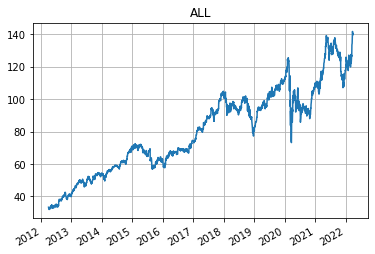

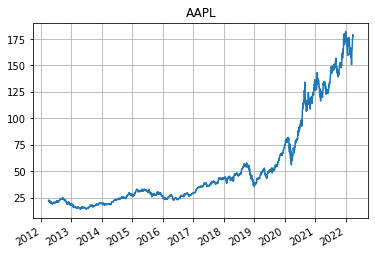

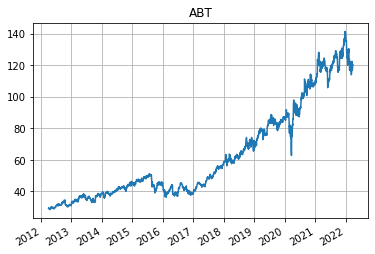

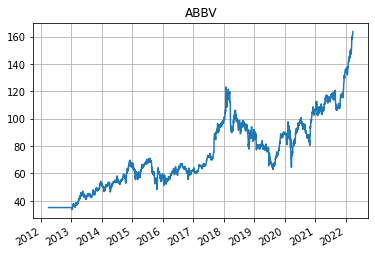

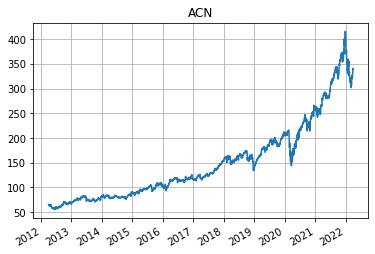

In [4]:
# Because the date was given in seconds the data needs to be aggregated across each day to reduce NaN values
stocks = stocks.groupby(stocks.index).sum()

# Because the stocks are from different exchanges there may be some discrepency of days traded. So there are
# some days that have a value of 0 for these days. 
# Interpolate these values so these are continuous across all days. 
stocks = stocks.replace(0, np.NaN)
stocks.interpolate(method="linear", limit_direction="forward", axis=0)

# Fill in the stocks that have no initial value with the first non NaN number
stocks = stocks.fillna(method="bfill", axis=0)

# Visualize the results
for i in stocks.columns[:5]:
    stocks[i].plot(grid=True)
    plt.title(i)
    plt.show()

In [5]:
# Create dataframe of returns
returns = stocks

r = lambda x: (x - initial)/initial

for ticker in stocks.columns:
    initial = stocks[ticker].iloc[0]
    returns[ticker] = stocks[ticker].apply(r)

returns.describe()

,ALL,AAPL,ABT,ABBV,ACN,AMGN,AMZN,AIG,BLK,C,...,SO,VZ,USB,WFC,UNP,V,WBA,USD,UPS,UNH
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,...,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,1.417969,1.385039,1.138912,1.103129,1.276722,1.471341,5.651552,0.612386,1.126642,0.528322,...,0.123114,0.331619,0.445277,0.349686,1.359663,2.835544,0.816884,4.542222,0.440239,2.298856
std,0.790424,1.924679,1.021616,0.745210,1.208996,0.710273,5.436550,0.333784,0.896597,0.339571,...,0.166321,0.130360,0.262895,0.270674,0.961509,2.161349,0.495897,5.986071,0.436000,1.990436
min,-0.041667,-0.368697,-0.028248,-0.040148,-0.155902,-0.036999,-0.063368,-0.397498,-0.208057,-0.326824,...,-0.109632,-0.044652,-0.092085,-0.387424,-0.042153,-0.056547,-0.151347,-0.421025,-0.132019,-0.137348
25%,0.774580,0.093430,0.345591,0.567412,0.270881,1.034466,0.811070,0.413619,0.529558,0.299430,...,-0.008877,0.237279,0.249685,0.222979,0.592062,0.881619,0.424034,0.603275,0.208566,0.472302
50%,1.432554,0.603558,0.652486,0.913013,0.858146,1.487594,3.471623,0.702919,0.864002,0.472878,...,0.072015,0.310488,0.397036,0.416256,1.021989,1.998151,0.801376,2.368463,0.316041,1.841763
75%,1.982689,1.568978,1.845778,1.648776,1.847152,1.979885,8.512181,0.857235,1.484391,0.830214,...,0.211995,0.439836,0.669190,0.555201,2.064507,4.920995,1.305328,5.336107,0.455498,3.502664
max,3.250600,7.237983,3.814348,3.662585,5.343259,2.831302,17.840747,1.155919,3.709341,1.221589,...,0.608966,0.611371,0.994639,0.910461,4.049088,7.436040,1.830211,28.698891,1.877278,7.809540


### Market returns data

Using the S&P500 index returns as this is a common metric used for the market returns for analysis.


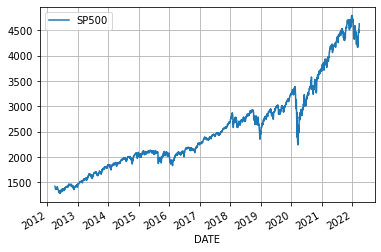

In [6]:
sp500 = pd.read_csv("data/SP500.csv", index_col=0)

sp500 = sp500.loc["2012-04":].replace(".", np.NaN).astype("float64")
sp500 = sp500.dropna()

sp500.index = pd.to_datetime(sp500.index)

sp500.plot(grid=True)
plt.show()

In [7]:
# Change from index value to returns
initial = sp500.iloc[0, 0]
r = lambda x: (x - initial)/initial

sp500[["return"]] = sp500.apply(r)

sp500["return"]

DATE
2012-04-02    0.000000
2012-04-03   -0.003989
2012-04-04   -0.014150
2012-04-05   -0.014771
2012-04-09   -0.025961
                ...   
2022-03-23    2.140320
2022-03-24    2.185365
2022-03-25    2.201502
2022-03-28    2.224377
2022-03-29    2.263897
Name: return, Length: 2515, dtype: float64

In [8]:
# Create 100 random portfolios 

random.seed(22)
tickers = list(stocks.columns)
stock_list = []
portfolio_dict = {}

for i in range(100):
    stock_list = []
    while len(set(stock_list)) < 20:
    
        stock_list.append(random.choice(tickers))
    
    portfolio_dict[i] = sorted(list(set(stock_list)))

In [9]:
# Create a dataframe of each portfolio
portfolio_df = pd.DataFrame()
for i in range(len(portfolio_dict.values())):
    portfolio = list(portfolio_dict.values())[i]
    test_p = pd.Series(returns[portfolio].fillna(0).mean(axis=1), name=i)
    portfolio_df = pd.concat([portfolio_df, test_p], axis=1)

portfolio_df.tail() 

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-03-24 00:00:00,2.482927,3.042834,2.834309,1.975999,1.944461,3.666733,2.269678,1.712849,2.549552,1.672277,...,2.296824,2.648192,3.798659,2.284089,2.055537,1.767985,3.780250,1.969014,2.365204,2.701323
2022-03-25 00:00:00,2.509802,3.056447,2.854858,1.995712,1.966935,3.677003,2.286892,1.739719,2.574713,1.684358,...,2.306535,2.663671,3.807220,2.286198,2.070347,1.779165,3.786191,1.986920,2.378276,2.720843
2022-03-28 00:00:00,2.537158,3.095490,2.892936,1.992416,1.965865,3.723942,2.300200,1.744617,2.611357,1.693322,...,2.319921,2.679015,3.853583,2.295607,2.077803,1.774224,3.815657,2.004259,2.400508,2.734049
2022-03-29 00:00:00,2.564285,3.159331,2.934268,1.995271,1.995005,3.839635,2.345166,1.770255,2.652901,1.733551,...,2.374314,2.726327,3.900763,2.326683,2.128524,1.801088,3.914438,2.032761,2.456163,2.789442
2022-03-30 00:00:00,2.548242,3.066847,2.895260,2.006561,1.988831,3.726931,2.332534,1.763980,2.621588,1.723455,...,2.349586,2.717201,3.872924,2.305680,2.117360,1.774723,3.826850,2.015190,2.429104,2.770590


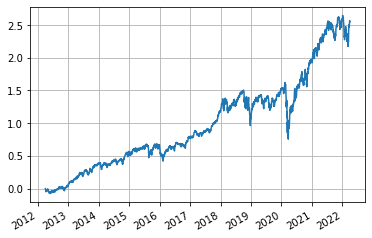

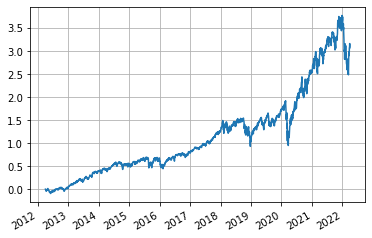

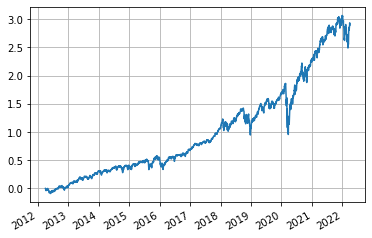

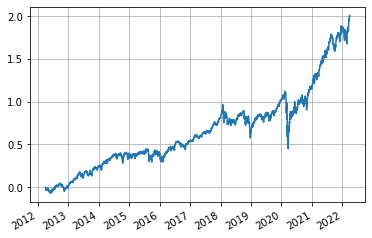

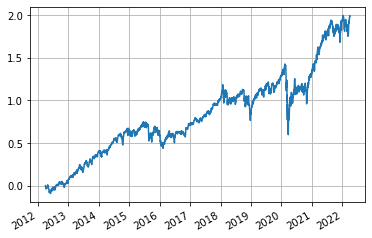

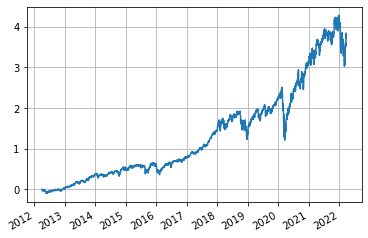

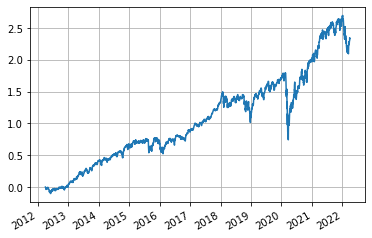

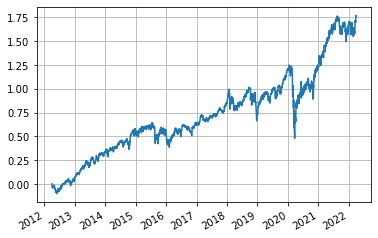

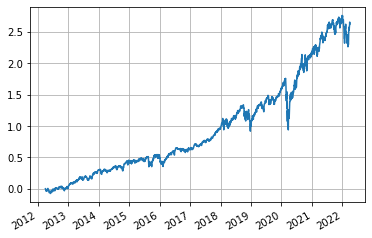

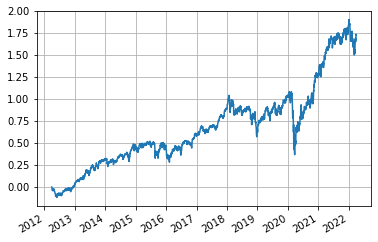

In [10]:
# View first 10 portfolio returns
for i in portfolio_df.columns[:10]:
    portfolio_df[i].plot(grid=True)
    plt.show()

In [11]:
def B(dataframe):
    cov = dataframe.cov()
    beta = pd.DataFrame()
    for p in range(len(dataframe.columns)):
        bet = pd.Series(cov.iloc[p,-1]/cov.iloc[-1,-1], name=p)
        beta = pd.concat([beta, bet], axis=1)
    return beta

In [13]:
# Calculate beta values
market_return = sp500["return"]

# # This cell takes forever to run so I will make a csv of the results
p_df = pd.concat([portfolio_df, market_return], axis=1)
b_df = pd.DataFrame()

for i in p_df.index[1:]:
    print(i)
    betas = B(p_df.loc[:i])
    b_df = pd.concat([b_df, pd.DataFrame((betas))], axis=0)
b_df.head()

2012-04-03 00:00:00
2012-04-04 00:00:00
2012-04-05 00:00:00
2012-04-09 00:00:00
2012-04-10 00:00:00
2012-04-11 00:00:00
2012-04-12 00:00:00
2012-04-13 00:00:00
2012-04-16 00:00:00
2012-04-17 00:00:00
2012-04-18 00:00:00
2012-04-19 00:00:00
2012-04-20 00:00:00
2012-04-23 00:00:00
2012-04-24 00:00:00
2012-04-25 00:00:00
2012-04-26 00:00:00
2012-04-27 00:00:00
2012-04-30 00:00:00
2012-05-01 00:00:00
2012-05-02 00:00:00
2012-05-03 00:00:00
2012-05-04 00:00:00
2012-05-07 00:00:00
2012-05-08 00:00:00
2012-05-09 00:00:00
2012-05-10 00:00:00
2012-05-11 00:00:00
2012-05-14 00:00:00
2012-05-15 00:00:00
2012-05-16 00:00:00
2012-05-17 00:00:00
2012-05-18 00:00:00
2012-05-21 00:00:00
2012-05-22 00:00:00
2012-05-23 00:00:00
2012-05-24 00:00:00
2012-05-25 00:00:00
2012-05-29 00:00:00
2012-05-30 00:00:00
2012-05-31 00:00:00
2012-06-01 00:00:00
2012-06-04 00:00:00
2012-06-05 00:00:00
2012-06-06 00:00:00
2012-06-07 00:00:00
2012-06-08 00:00:00
2012-06-11 00:00:00
2012-06-12 00:00:00
2012-06-13 00:00:00


2013-11-20 00:00:00
2013-11-21 00:00:00
2013-11-22 00:00:00
2013-11-25 00:00:00
2013-11-26 00:00:00
2013-11-27 00:00:00
2013-11-29 00:00:00
2013-12-02 00:00:00
2013-12-03 00:00:00
2013-12-04 00:00:00
2013-12-05 00:00:00
2013-12-06 00:00:00
2013-12-09 00:00:00
2013-12-10 00:00:00
2013-12-11 00:00:00
2013-12-12 00:00:00
2013-12-13 00:00:00
2013-12-16 00:00:00
2013-12-17 00:00:00
2013-12-18 00:00:00
2013-12-19 00:00:00
2013-12-20 00:00:00
2013-12-23 00:00:00
2013-12-24 00:00:00
2013-12-26 00:00:00
2013-12-27 00:00:00
2013-12-30 00:00:00
2013-12-31 00:00:00
2014-01-02 00:00:00
2014-01-03 00:00:00
2014-01-06 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00
2014-01-09 00:00:00
2014-01-10 00:00:00
2014-01-13 00:00:00
2014-01-14 00:00:00
2014-01-15 00:00:00
2014-01-16 00:00:00
2014-01-17 00:00:00
2014-01-21 00:00:00
2014-01-22 00:00:00
2014-01-23 00:00:00
2014-01-24 00:00:00
2014-01-27 00:00:00
2014-01-28 00:00:00
2014-01-29 00:00:00
2014-01-30 00:00:00
2014-01-31 00:00:00
2014-02-03 00:00:00


2015-07-14 00:00:00
2015-07-15 00:00:00
2015-07-16 00:00:00
2015-07-17 00:00:00
2015-07-20 00:00:00
2015-07-21 00:00:00
2015-07-22 00:00:00
2015-07-23 00:00:00
2015-07-24 00:00:00
2015-07-27 00:00:00
2015-07-28 00:00:00
2015-07-29 00:00:00
2015-07-30 00:00:00
2015-07-31 00:00:00
2015-08-03 00:00:00
2015-08-04 00:00:00
2015-08-05 00:00:00
2015-08-06 00:00:00
2015-08-07 00:00:00
2015-08-10 00:00:00
2015-08-11 00:00:00
2015-08-12 00:00:00
2015-08-13 00:00:00
2015-08-14 00:00:00
2015-08-17 00:00:00
2015-08-18 00:00:00
2015-08-19 00:00:00
2015-08-20 00:00:00
2015-08-21 00:00:00
2015-08-24 00:00:00
2015-08-25 00:00:00
2015-08-26 00:00:00
2015-08-27 00:00:00
2015-08-28 00:00:00
2015-08-31 00:00:00
2015-09-01 00:00:00
2015-09-02 00:00:00
2015-09-03 00:00:00
2015-09-04 00:00:00
2015-09-08 00:00:00
2015-09-09 00:00:00
2015-09-10 00:00:00
2015-09-11 00:00:00
2015-09-14 00:00:00
2015-09-15 00:00:00
2015-09-16 00:00:00
2015-09-17 00:00:00
2015-09-18 00:00:00
2015-09-21 00:00:00
2015-09-22 00:00:00


2017-03-01 00:00:00
2017-03-02 00:00:00
2017-03-03 00:00:00
2017-03-06 00:00:00
2017-03-07 00:00:00
2017-03-08 00:00:00
2017-03-09 00:00:00
2017-03-10 00:00:00
2017-03-13 00:00:00
2017-03-14 00:00:00
2017-03-15 00:00:00
2017-03-16 00:00:00
2017-03-17 00:00:00
2017-03-20 00:00:00
2017-03-21 00:00:00
2017-03-22 00:00:00
2017-03-23 00:00:00
2017-03-24 00:00:00
2017-03-27 00:00:00
2017-03-28 00:00:00
2017-03-29 00:00:00
2017-03-30 00:00:00
2017-03-31 00:00:00
2017-04-03 00:00:00
2017-04-04 00:00:00
2017-04-05 00:00:00
2017-04-06 00:00:00
2017-04-07 00:00:00
2017-04-10 00:00:00
2017-04-11 00:00:00
2017-04-12 00:00:00
2017-04-13 00:00:00
2017-04-17 00:00:00
2017-04-18 00:00:00
2017-04-19 00:00:00
2017-04-20 00:00:00
2017-04-21 00:00:00
2017-04-24 00:00:00
2017-04-25 00:00:00
2017-04-26 00:00:00
2017-04-27 00:00:00
2017-04-28 00:00:00
2017-05-01 00:00:00
2017-05-02 00:00:00
2017-05-03 00:00:00
2017-05-04 00:00:00
2017-05-05 00:00:00
2017-05-08 00:00:00
2017-05-09 00:00:00
2017-05-10 00:00:00


2018-10-16 00:00:00
2018-10-17 00:00:00
2018-10-18 00:00:00
2018-10-19 00:00:00
2018-10-22 00:00:00
2018-10-23 00:00:00
2018-10-24 00:00:00
2018-10-25 00:00:00
2018-10-26 00:00:00
2018-10-29 00:00:00
2018-10-30 00:00:00
2018-10-31 00:00:00
2018-11-01 00:00:00
2018-11-02 00:00:00
2018-11-05 00:00:00
2018-11-06 00:00:00
2018-11-07 00:00:00
2018-11-08 00:00:00
2018-11-09 00:00:00
2018-11-12 00:00:00
2018-11-13 00:00:00
2018-11-14 00:00:00
2018-11-15 00:00:00
2018-11-16 00:00:00
2018-11-19 00:00:00
2018-11-20 00:00:00
2018-11-21 00:00:00
2018-11-23 00:00:00
2018-11-26 00:00:00
2018-11-27 00:00:00
2018-11-28 00:00:00
2018-11-29 00:00:00
2018-11-30 00:00:00
2018-12-03 00:00:00
2018-12-04 00:00:00
2018-12-06 00:00:00
2018-12-07 00:00:00
2018-12-10 00:00:00
2018-12-11 00:00:00
2018-12-12 00:00:00
2018-12-13 00:00:00
2018-12-14 00:00:00
2018-12-17 00:00:00
2018-12-18 00:00:00
2018-12-19 00:00:00
2018-12-20 00:00:00
2018-12-21 00:00:00
2018-12-24 00:00:00
2018-12-26 00:00:00
2018-12-27 00:00:00


2020-06-05 00:00:00
2020-06-08 00:00:00
2020-06-09 00:00:00
2020-06-10 00:00:00
2020-06-11 00:00:00
2020-06-12 00:00:00
2020-06-15 00:00:00
2020-06-16 00:00:00
2020-06-17 00:00:00
2020-06-18 00:00:00
2020-06-19 00:00:00
2020-06-22 00:00:00
2020-06-23 00:00:00
2020-06-24 00:00:00
2020-06-25 00:00:00
2020-06-26 00:00:00
2020-06-29 00:00:00
2020-06-30 00:00:00
2020-07-01 00:00:00
2020-07-02 00:00:00
2020-07-06 00:00:00
2020-07-07 00:00:00
2020-07-08 00:00:00
2020-07-09 00:00:00
2020-07-10 00:00:00
2020-07-13 00:00:00
2020-07-14 00:00:00
2020-07-15 00:00:00
2020-07-16 00:00:00
2020-07-17 00:00:00
2020-07-20 00:00:00
2020-07-21 00:00:00
2020-07-22 00:00:00
2020-07-23 00:00:00
2020-07-24 00:00:00
2020-07-27 00:00:00
2020-07-28 00:00:00
2020-07-29 00:00:00
2020-07-30 00:00:00
2020-07-31 00:00:00
2020-08-03 00:00:00
2020-08-04 00:00:00
2020-08-05 00:00:00
2020-08-06 00:00:00
2020-08-07 00:00:00
2020-08-10 00:00:00
2020-08-11 00:00:00
2020-08-12 00:00:00
2020-08-13 00:00:00
2020-08-14 00:00:00


2022-01-21 00:00:00
2022-01-24 00:00:00
2022-01-25 00:00:00
2022-01-26 00:00:00
2022-01-27 00:00:00
2022-01-28 00:00:00
2022-01-31 00:00:00
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00
2022-02-11 00:00:00
2022-02-14 00:00:00
2022-02-15 00:00:00
2022-02-16 00:00:00
2022-02-17 00:00:00
2022-02-18 00:00:00
2022-02-22 00:00:00
2022-02-23 00:00:00
2022-02-24 00:00:00
2022-02-25 00:00:00
2022-02-28 00:00:00
2022-03-01 00:00:00
2022-03-02 00:00:00
2022-03-03 00:00:00
2022-03-04 00:00:00
2022-03-07 00:00:00
2022-03-08 00:00:00
2022-03-09 00:00:00
2022-03-10 00:00:00
2022-03-11 00:00:00
2022-03-14 00:00:00
2022-03-15 00:00:00
2022-03-16 00:00:00
2022-03-17 00:00:00
2022-03-18 00:00:00
2022-03-21 00:00:00
2022-03-22 00:00:00
2022-03-23 00:00:00
2022-03-24 00:00:00
2022-03-25 00:00:00
2022-03-28 00:00:00
2022-03-29 00:00:00
2022-03-30 00:00:00


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.866705,1.322836,0.834046,1.002412,1.252902,0.651747,1.178986,1.602618,0.618939,2.179042,...,0.306803,0.493303,1.544880,0.591187,0.849318,1.080402,2.501037,0.804295,1.426625,1.0
0,1.097624,0.796565,1.025418,0.716265,0.831336,1.016367,0.787890,1.121719,0.823259,0.940720,...,0.795747,0.818835,0.930452,0.681986,0.632525,0.758778,1.256717,0.680857,1.048644,1.0
0,1.171048,0.885936,0.917746,0.833165,0.782842,0.911029,0.727343,1.175331,0.883377,0.888086,...,0.656258,0.807820,0.925897,0.699496,0.653739,0.653766,1.269126,0.545405,1.042840,1.0
0,1.172236,0.980403,0.897146,0.909762,0.871751,0.968611,0.824636,1.121494,0.928482,0.925917,...,0.714424,0.801339,0.882981,0.752435,0.757772,0.734543,1.229904,0.667603,0.932985,1.0
0,1.134030,0.954287,0.920677,0.883321,0.917752,1.005435,0.873569,1.022844,0.902412,0.920086,...,0.819192,0.842650,0.873300,0.818627,0.775841,0.839079,1.101164,0.776421,0.925431,1.0


In [14]:
b_df.index = p_df.index[1:]
b_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,...,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2515.0
mean,1.211338,1.337033,1.145882,0.845498,1.137738,1.442718,1.348961,1.025210,1.066682,0.967052,...,1.209342,1.438051,1.176864,0.803770,1.071971,1.387246,1.094563,1.135782,1.088057,1.0
std,0.140025,0.142973,0.185330,0.054023,0.173708,0.365032,0.195971,0.176991,0.176351,0.141462,...,0.106590,0.350891,0.086811,0.167279,0.182978,0.265050,0.142205,0.097973,0.147976,0.0
min,0.668505,0.718681,0.829681,0.656666,0.782842,0.651747,0.619270,0.720671,0.618939,0.688562,...,0.306803,0.493303,0.757854,0.501680,0.622049,0.653766,0.909509,0.545405,0.867882,1.0
25%,1.183537,1.295132,0.977397,0.812034,1.014440,1.150537,1.308860,0.875105,0.920981,0.850842,...,1.173265,1.139203,1.168297,0.667024,0.911245,1.178707,0.959548,1.128977,0.947843,1.0
50%,1.241150,1.341026,1.105573,0.856795,1.150396,1.299159,1.412099,1.048225,1.047841,0.991080,...,1.228751,1.436540,1.189823,0.746483,1.155786,1.390095,1.068576,1.150956,1.050749,1.0
75%,1.291695,1.429063,1.348351,0.886490,1.283309,1.851219,1.487144,1.162941,1.250756,1.023742,...,1.277636,1.773181,1.237761,0.969592,1.227637,1.578376,1.239865,1.179375,1.228678,1.0
max,1.866705,1.548098,1.436692,1.002412,1.375695,1.972907,1.514010,1.602618,1.357726,2.179042,...,1.348197,1.934156,1.544880,1.087167,1.286271,1.781520,2.501037,1.269567,1.426625,1.0


In [15]:
b_df.iloc[253:].describe().T[b_df.describe().T["mean"]>1].sort_values("std")

,count,mean,std,min,25%,50%,75%,max
39,2262.0,1.091186,0.035437,1.030308,1.061111,1.085733,1.122536,1.156180
25,2262.0,1.252323,0.039153,1.068352,1.235159,1.267343,1.278087,1.290542
98,2262.0,1.163343,0.041141,1.052235,1.132076,1.159049,1.184339,1.269567
89,2262.0,1.134489,0.042239,0.989709,1.114144,1.129123,1.156702,1.213103
58,2262.0,1.270878,0.043069,1.193591,1.239923,1.261321,1.303138,1.352167
...,...,...,...,...,...,...,...,...
85,2262.0,1.460398,0.242186,0.954012,1.194479,1.498662,1.696456,1.767535
46,2262.0,1.365096,0.258117,0.980720,1.089145,1.464702,1.597042,1.705301
92,2262.0,1.503809,0.305044,1.035764,1.188852,1.499101,1.781923,1.934156
55,2262.0,1.616192,0.322417,0.812543,1.318630,1.678511,1.912367,1.968040


In [16]:
p_df.describe().T.sort_values("max")

,count,mean,std,min,25%,50%,75%,max
51,2516.0,0.654166,0.421178,-0.075892,0.348169,0.600970,0.911903,1.604587
27,2516.0,0.603942,0.401713,-0.076273,0.351705,0.520990,0.776563,1.623037
15,2516.0,0.677436,0.448273,-0.117781,0.366356,0.653495,0.980182,1.669060
26,2516.0,0.726876,0.436439,-0.094537,0.458279,0.739616,0.975341,1.721065
44,2516.0,0.723042,0.435490,-0.099491,0.465070,0.722817,0.926392,1.748431
...,...,...,...,...,...,...,...,...
5,2516.0,1.330715,1.160608,-0.105272,0.421655,0.901423,1.941267,4.276681
96,2516.0,1.281023,1.084377,-0.075337,0.494794,0.933181,1.729245,4.291539
12,2516.0,1.230155,1.097571,-0.090966,0.433074,0.894959,1.637302,4.510924
57,2516.0,1.275504,1.043111,-0.096605,0.594244,0.953435,1.626767,4.561628


In [22]:
p_df[[39, 25, 98, 89, 58, "return"]].describe().T

,count,mean,std,min,25%,50%,75%,max
39,2516.0,0.855371,0.627701,-0.090045,0.422461,0.750528,1.165242,2.415663
25,2516.0,0.990402,0.727173,-0.096108,0.470223,0.849541,1.396051,2.687186
98,2516.0,0.939072,0.726448,-0.097132,0.434773,0.754030,1.296953,2.728909
89,2516.0,0.917867,0.680891,-0.077566,0.417866,0.730834,1.319468,2.420270
58,2516.0,0.982636,0.775533,-0.136902,0.447544,0.833972,1.320102,3.328811
return,2515.0,0.795021,0.606429,-0.099363,0.374856,0.665661,1.066369,2.380144


In [18]:
# Save the results because it took forever to run
b_df.to_csv("data/100portfolioBetas.csv")

In [19]:
# Save the results because I forgot to set random seed
p_df.to_csv("data/100portfolioReturns.csv")

In [20]:
df_dict = pd.DataFrame(portfolio_dict)
df_dict.to_csv("data/100portfolioStocks.csv")